# Практическое задание №4

В файле laptops_na.csv" содержаться следующие переменные:

- `"brand"` : Название бренда ноутбука.
- `"Model"` : Конкретная модель или серия ноутбука.
- `"Price"` : Цена ноутбука в индийских рупиях.
- `"Rating"` : Рейтинг, присвоенный ноутбуку на основе его характеристик.
- `"processor_brand"` : Марка процессора, используемого в ноутбуке.
- `"processor_tier"` : Уровень производительности или категория процессора.
- `"num_cores"` : Количество вычислительных ядер в процессоре.
- `"num_threads"` : Количество потоков, поддерживаемых процессором.
- `"ram_memory"` : Объем оперативной памяти, используемый в ноутбуке.
- `"primary_storage_type"` : Тип основного хранилища (например, HDD, SSD).
- `"primary_storage -apacity"` : Емкость основного хранилища ноутбука.
- `"secondary_storage_type"` : Тип вторичного хранилища, если оно доступно.
- `"secondary_storage_capacity"` : Емкость вторичного хранилища ноутбука.
- `"gpu_brand"` : Марка графического процессора (GPU).
- `"gpu_type"` : Тип графического процессора.
- `"is_touch_screen"` : Указывает, оснащен ли ноутбук функцией сенсорного экрана.
- `"display_size"` : Размер дисплея ноутбука в дюймах.
- `"resolution_width"` : Разрешение по ширине дисплея.
- `"resolution_height"` : Разрешение дисплея по высоте.
- `"OS"` : Установленная на ноутбуке операционная система.
- `"year_of_warranty"` : Срок гарантии, предоставляемой на ноутбук, обычно в годах.



Задания:

    •	Постройте модель множественной линейной регрессии. Зависимая переменная - Price. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии.
    
    •	Оцените характеристики регрессионной модели в целом.
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной.
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять на цену ноутбуков!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('laptops.csv', index_col=0)

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'laptops.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       944 non-null    object 
 1   Model                       946 non-null    object 
 2   Price                       942 non-null    float64
 3   Rating                      936 non-null    float64
 4   processor_brand             930 non-null    object 
 5   processor_tier              950 non-null    object 
 6   num_cores                   958 non-null    float64
 7   num_threads                 953 non-null    float64
 8   ram_memory                  942 non-null    float64
 9   primary_storage_type        932 non-null    object 
 10  primary_storage_capacity    928 non-null    float64
 11  secondary_storage_type      946 non-null    object 
 12  secondary_storage_capacity  942 non-null    float64
 13  gpu_brand                   950 non-nu

In [ ]:
# Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений
primary_storage_capacity,6.357215
processor_brand,6.155399
resolution_height,6.054490
primary_storage_type,5.953582
Rating,5.549950
resolution_width,5.348133
gpu_type,5.045409
secondary_storage_capacity,4.944501
Price,4.944501
ram_memory,4.944501


Заметим, что по всем переменным примерно одинаковое количество информации, около 940-950 заполненных строк данных и не более 6% пропущенных значений

# Зависимая переменная:

In [ ]:
df['Price'].describe()

count       942.000000
mean      76964.924628
std       56821.995229
min        9800.000000
25%       43547.500000
50%       61706.000000
75%       88997.500000
max      454490.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

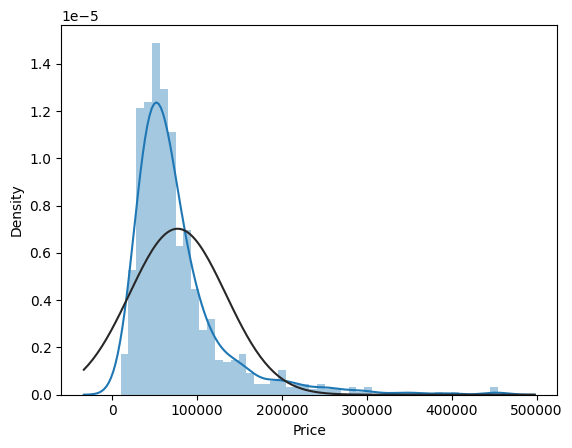

In [ ]:
sns.distplot(df.Price, fit=stats.norm)

In [ ]:
print('Skewness: {:.4f}'.format(df['Price'].skew()))
print('Kurtosis: {:.4f}'.format(df['Price'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['Price'].quantile(0.75) - df['Price'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['Price'].quantile(0.9)/df['Price'].quantile(0.1)))

Skewness: 2.7843
Kurtosis: 10.8358
Quartile Deviation: 22725.0000
Decile Ratio: 4.3055


In [ ]:
df = df.dropna(subset=['Price'])
stats.kstest(df.Price, 'norm', args=(df.Price.mean(), df.Price.std()))

KstestResult(statistic=0.18025942533524242, pvalue=2.9704447687930686e-27, statistic_location=80020.0, statistic_sign=1)

Делаем выводы, что зависимая переменная "Price" демонстрирует ненормальное распределение, с выраженной асимметрией, направленной в сторону меньших значений, а также высокую пиковость. Среднее значение составляет 76964, при этом стандартное отклонение значительное — 56821, что указывает на большой разброс данных. Медиана равна 61706, а межквартильная широта составляет 22725, что также свидетельствует о значительной вариации среди средних 50% значений относительно медианы. Децильное отношение равно 4.3, что подчеркивает неравномерность распределения, где верхние 10% значений значительно превышают нижние 10%.

# Корреляции


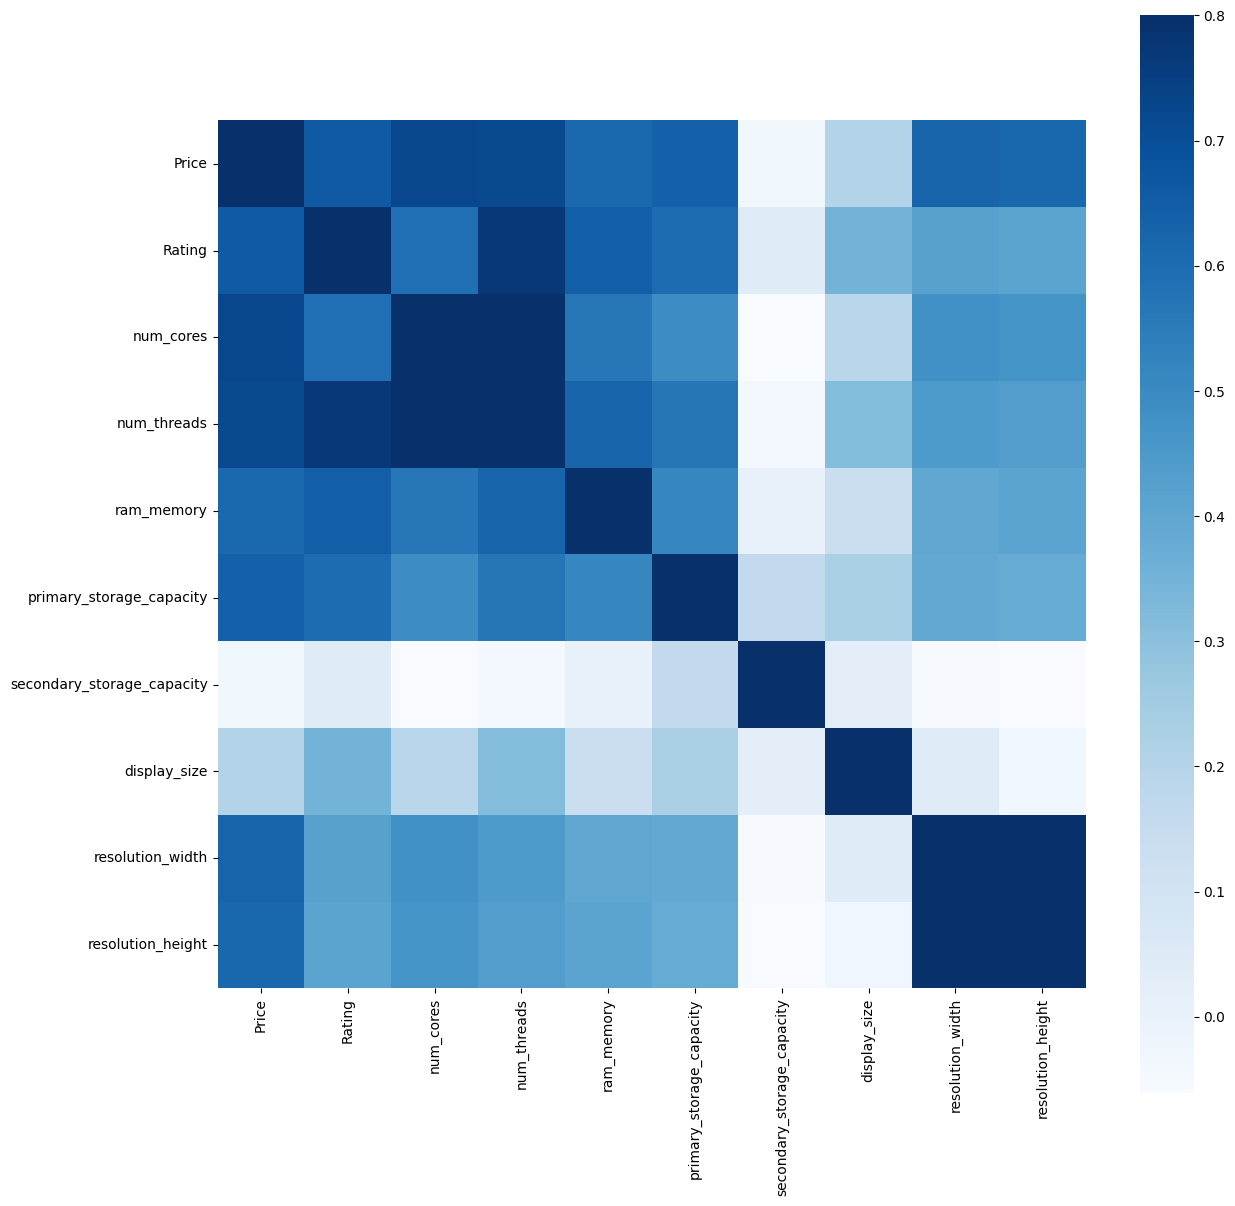

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues')
plt.show()

In [ ]:
# корреляции зависимой переменной со всеми остальными по убыванию значений коэффициентов корреляции
df.corrwith(df['Price'], numeric_only=True).sort_values(ascending=False)

Price                         1.000000
num_cores                     0.725934
num_threads                   0.716827
Rating                        0.659263
primary_storage_capacity      0.636234
resolution_width              0.628331
resolution_height             0.618031
ram_memory                    0.612126
display_size                  0.207328
secondary_storage_capacity   -0.026986
dtype: float64

In [ ]:
df['num_threads'].corr(df['num_cores'])

0.9033755851911407

In [ ]:
df['num_threads'].corr(df['Rating'])

0.770428818067209

In [ ]:
df['num_cores'].corr(df['Rating'])

0.5907137636639062

In [ ]:
df['resolution_width'].corr(df['resolution_height'])

0.8047359623345459

In [ ]:
df['ram_memory'].corr(df['Rating'])

0.6448791733166135

Корреляционный анализ позволяет сделать следующие выводы:

Переменные "num_cores" и "num_threads" имеют самую высокую корреляцию с зависимой переменной, то есть количество вычислительных ядер в процессоре и количество потоков, поддерживаемых процессором во многом определяет цену продажи. В то же время их корреляция друг с другом очень высока, что логично. Оставим только одну переменную в качестве предиктора. Это будет "num_cores" так как она имеет более высокую корреляцию с зависимой переменной.

Похожая ситуация с переменными "resolution_width" и "resolution_height". В модель будет включена переменная "resolution_width", поскольку она сильнее коррелирует с зависимой переменной.

Также высокая корреляция зависимой переменной с переменной "Rating", отражающей рейтинг, присвоенный ноутбуку на основе его характеристик. Но в модель ее не возьмем, так как она, соответсвенно, коррелирует со многими переменными.

Построим парные графики, чтобы убедиться, что взаимосвязь носит линейный характер и диагностировать выбросы:

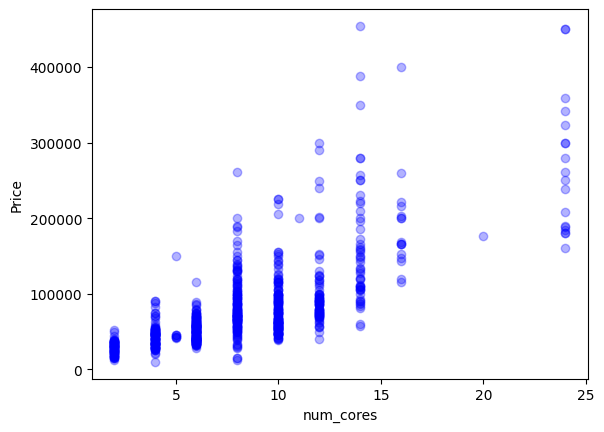

In [ ]:
plt.scatter(df.num_cores, df.Price, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('num_cores')
plt.ylabel('Price')
plt.show()

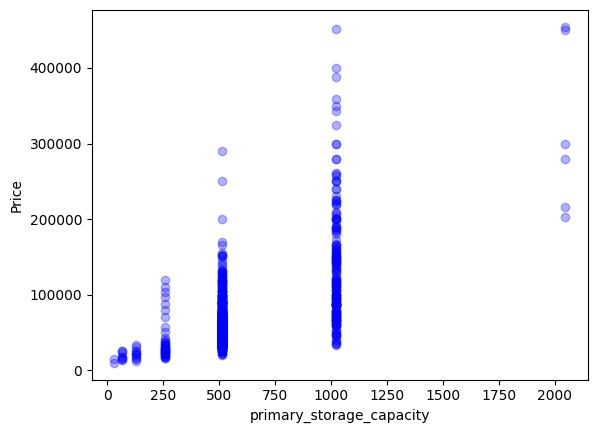

In [ ]:
plt.scatter(df.primary_storage_capacity, df.Price, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('primary_storage_capacity')
plt.ylabel('Price')
plt.show()

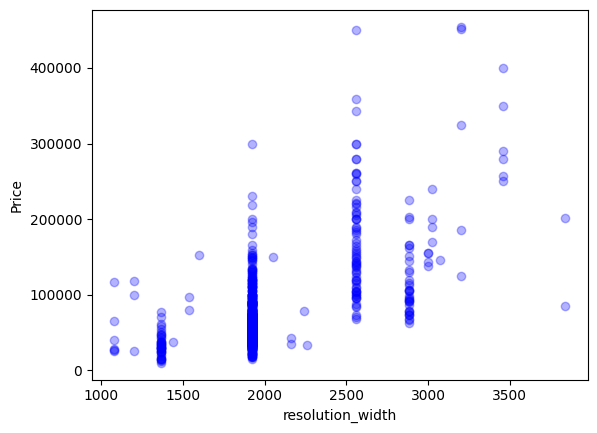

In [ ]:
plt.scatter(df.resolution_width, df.Price, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('resolution_width')
plt.ylabel('Price')
plt.show() # есть выбросы

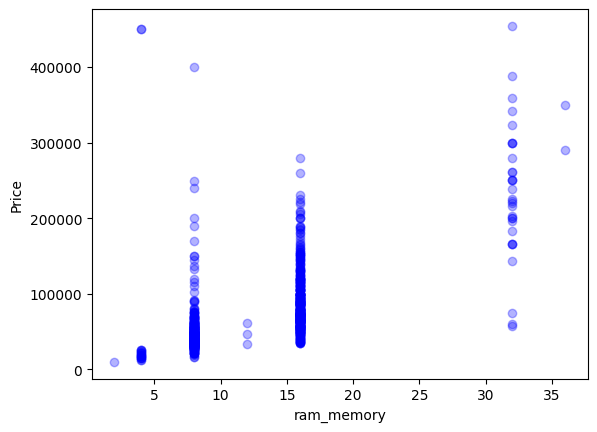

In [ ]:
plt.scatter(df.ram_memory, df.Price, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('ram_memory')
plt.ylabel('Price')
plt.show() # есть выбросы

In [ ]:
df[['num_cores','primary_storage_capacity','resolution_width','ram_memory']].corr()

,num_cores,primary_storage_capacity,resolution_width,ram_memory
num_cores,1.000000,0.492758,0.478386,0.562307
primary_storage_capacity,0.492758,1.000000,0.391985,0.517003
resolution_width,0.478386,0.391985,1.000000,0.400734
ram_memory,0.562307,0.517003,0.400734,1.000000


Значительная корреляция между 'ram_memory' и 'num_cores', 'primary_storage_capacity'

In [ ]:
df[['num_cores','primary_storage_capacity','resolution_width']].corr()

,num_cores,primary_storage_capacity,resolution_width
num_cores,1.000000,0.492758,0.478386
primary_storage_capacity,0.492758,1.000000,0.391985
resolution_width,0.478386,0.391985,1.000000


# Категориальные предикторы

In [ ]:
df['brand'].value_counts()

brand
asus         186
lenovo       185
hp           183
dell          97
acer          83
msi           80
apple         15
infinix       11
zebronics      6
lg             6
ultimus        6
samsung        6
fujitsu        5
avita          5
chuwi          4
wings          3
realme         2
microsoft      2
tecno          2
honor          2
primebook      2
axl            2
jio            1
iball          1
gigabyte       1
walker         1
Name: count, dtype: int64

In [ ]:
brands = ['asus', 'lenovo', 'hp', 'dell', 'acer', 'msi', 'apple', 'infinix']
df = df[(df['brand'] == 'asus') | (df['brand'] == 'lenovo') | (df['brand'] == 'hp') | (df['brand'] == 'dell') | (df['brand'] == 'acer') | (df['brand'] == 'msi') | (df['brand'] == 'apple') | (df['brand'] == 'infinix')]
df['brand'].value_counts()

brand
asus       186
lenovo     185
hp         183
dell        97
acer        83
msi         80
apple       15
infinix     11
Name: count, dtype: int64

In [ ]:
brand_dummies=pd.get_dummies(df.brand, prefix='brand', prefix_sep='_', dtype=int)
brand_dummies.head()

,brand_acer,brand_apple,brand_asus,brand_dell,brand_hp,brand_infinix,brand_lenovo,brand_msi
index,,,,,,,,
3.0,0,0,0,0,1,0,0,0
4.0,1,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,1,0
6.0,0,1,0,0,0,0,0,0
7.0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, brand_dummies], axis=1)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,OS,year_of_warranty,brand_acer,brand_apple,brand_asus,brand_dell,brand_hp,brand_infinix,brand_lenovo,brand_msi
index,,,,,,,,,,,,,,,,,,,,,
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,windows,1,0,0,0,0,1,0,0,0
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,windows,1,1,0,0,0,0,0,0,0
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,windows,1,0,0,0,0,0,0,1,0
6.0,apple,NaN,70990.0,NaN,apple,m1,8.0,8.0,8.0,SSD,...,mac,1,0,1,0,0,0,0,0,0
7.0,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990.0,56.0,intel,core i5,4.0,8.0,16.0,SSD,...,windows,1,0,0,0,0,0,1,0,0


In [ ]:
df['Model'].value_counts() # не подходит

Model
HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen 5 5600H/ 8GB/ 512GB SSD/ Win11/ 4GB Graph)                      1
Lenovo IdeaPad Gaming 3 82K2025LIN Laptop (AMD Ryzen 5 5600H/ 16GB/ 512GB SSD/ Win11 Home/ 4GB Graph)          1
HP Pavilion Plus 14-eh1022TU Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win 11)                                1
Acer Aspire Lite AL15-51 UN.431SI.252 Laptop (11th Gen Core i3/ 8GB/ 512GB SSD/ Win11)                         1
Lenovo IdeaPad Gaming 3 15ACH6 82K2025JIN Laptop (AMD Ryzen 5 5600H/ 8GB/ 512GB SSD/ Win11 Home/ 4GB Graph)    1
                                                                                                              ..
Acer Aspire Lite AL15-41 Laptop (AMD Ryzen 5 5500U/ 16GB/ 1TB SSD/ Win11)                                      1
Lenovo IdeaPad Gaming 3 82K101LJIN Laptop (11th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ 4GB Graph)           1
HP Omen 16-XD0007ax Gaming Laptop (AMD Ryzen 7 7840HS/ 16GB/ 1TB SSD/ Win11/ 6GB Graph)   

In [ ]:
df['processor_brand'].value_counts()

processor_brand
intel    552
amd      218
apple     13
other      1
Name: count, dtype: int64

In [ ]:
df = df[df['processor_brand'] != 'other']
df['processor_brand'].value_counts()

processor_brand
intel    552
amd      218
apple     13
Name: count, dtype: int64

In [ ]:
processor_brand_dummies=pd.get_dummies(df.processor_brand, prefix='processor_brand', prefix_sep='_', dtype=int)
processor_brand_dummies.head()

,processor_brand_amd,processor_brand_apple,processor_brand_intel
index,,,
3.0,1,0,0
4.0,0,0,1
5.0,1,0,0
6.0,0,1,0
7.0,0,0,1


In [ ]:
df = pd.concat([df, processor_brand_dummies], axis=1)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,brand_apple,brand_asus,brand_dell,brand_hp,brand_infinix,brand_lenovo,brand_msi,processor_brand_amd,processor_brand_apple,processor_brand_intel
index,,,,,,,,,,,,,,,,,,,,,
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,0,0,0,1,0,0,0,1,0,0
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,0,0,0,0,0,0,0,0,0,1
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,0,0,0,0,0,1,0,1,0,0
6.0,apple,NaN,70990.0,NaN,apple,m1,8.0,8.0,8.0,SSD,...,1,0,0,0,0,0,0,0,1,0
7.0,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990.0,56.0,intel,core i5,4.0,8.0,16.0,SSD,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df['OS'].value_counts()

OS
windows    747
dos         30
mac         14
chrome      14
Name: count, dtype: int64

In [ ]:
df = df[df['OS'] != 'other']
df['OS'].value_counts()

OS
windows    747
dos         30
mac         14
chrome      14
Name: count, dtype: int64

In [ ]:
OS_dummies=pd.get_dummies(df.OS, prefix='OS', prefix_sep='_', dtype=int)
OS_dummies.head()

,OS_chrome,OS_dos,OS_mac,OS_windows
index,,,,
3.0,0,0,0,1
4.0,0,0,0,1
5.0,0,0,0,1
6.0,0,0,1,0
7.0,0,0,0,1


In [ ]:
df = pd.concat([df, OS_dummies], axis=1)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,brand_infinix,brand_lenovo,brand_msi,processor_brand_amd,processor_brand_apple,processor_brand_intel,OS_chrome,OS_dos,OS_mac,OS_windows
index,,,,,,,,,,,,,,,,,,,,,
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,0,0,0,1,0,0,0,0,0,1
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,0,0,0,0,0,1,0,0,0,1
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,0,1,0,1,0,0,0,0,0,1
6.0,apple,NaN,70990.0,NaN,apple,m1,8.0,8.0,8.0,SSD,...,0,0,0,0,1,0,0,0,1,0
7.0,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990.0,56.0,intel,core i5,4.0,8.0,16.0,SSD,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
df['processor_tier'].value_counts() # не берем

processor_tier
core i5         269
core i7         126
ryzen 5         122
core i3         105
ryzen 7          61
core i9          32
ryzen 3          30
celeron          25
ryzen 9          10
m3                7
other             6
m2                4
core ultra 7      3
pentium           2
m1                1
Name: count, dtype: int64

In [ ]:
df['primary_storage_type'].value_counts()

primary_storage_type
SSD    771
HDD     18
Name: count, dtype: int64

In [ ]:
df['gpu_type'].value_counts()

gpu_type
integrated    487
dedicated     300
apple          14
Name: count, dtype: int64

In [ ]:
gpu_type_dummies=pd.get_dummies(df.gpu_type, prefix='gpu_type', prefix_sep='_', dtype=int)
gpu_type_dummies.head()

,gpu_type_apple,gpu_type_dedicated,gpu_type_integrated
index,,,
3.0,0,1,0
4.0,0,0,1
5.0,0,0,1
6.0,1,0,0
7.0,0,0,1


In [ ]:
df = pd.concat([df, gpu_type_dummies], axis=1)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,processor_brand_amd,processor_brand_apple,processor_brand_intel,OS_chrome,OS_dos,OS_mac,OS_windows,gpu_type_apple,gpu_type_dedicated,gpu_type_integrated
index,,,,,,,,,,,,,,,,,,,,,
3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,SSD,...,1,0,0,0,0,0,1,0,1,0
4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,SSD,...,0,0,1,0,0,0,1,0,0,1
5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,SSD,...,1,0,0,0,0,0,1,0,0,1
6.0,apple,NaN,70990.0,NaN,apple,m1,8.0,8.0,8.0,SSD,...,0,1,0,0,0,1,0,1,0,0
7.0,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990.0,56.0,intel,core i5,4.0,8.0,16.0,SSD,...,0,0,1,0,0,0,1,0,0,1


# Множественная линейная регрессия

In [ ]:
import statsmodels.api as sm
df_model2 = df.dropna(subset=['Price', 'num_cores', 'primary_storage_capacity',	'resolution_width', 'brand_lenovo', 'brand_hp', 'brand_dell', 'brand_acer', 'brand_msi', 'brand_apple', 'brand_infinix', 'processor_brand_amd',	'processor_brand_apple', 	'OS_chrome',	'OS_dos',	'OS_mac', 'gpu_type_dedicated',	'gpu_type_integrated'])
# brand_asus, processor_brand_intel, OS_windows, gpu_type_apple - референтные группы
df_model2.shape

(715, 39)

<font color='red'> остатки можно было и обработать</font>

In [ ]:
x_mult = df_model2[['num_cores', 'primary_storage_capacity',	'resolution_width', 'brand_lenovo', 'brand_hp', 'brand_dell', 'brand_acer', 'brand_msi', 'brand_apple', 'brand_infinix', 'processor_brand_amd',	'processor_brand_apple', 	'OS_chrome',	'OS_dos',	'OS_mac', 'gpu_type_dedicated',	'gpu_type_integrated']]
y = df_model2['Price']
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          3.29e-211
Time:                        15:35:45   Log-Likelihood:                -8337.6
No. Observations:                 715   AIC:                         1.671e+04
Df Residuals:                     697   BIC:                         1.679e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())
#значения стандартизированных коэффициентов можно сравнивать друг с другом
#можно определить какой из предикторов сильней взаимосвязан с зависимой переменной

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              140.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                   1.58e-211
Time:                        15:35:45   Log-Likelihood:                         -484.01
No. Observations:                 715   AIC:                                      1002.
Df Residuals:                     698   BIC:                                      1080.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Нулевая гипотеза (H0): Независимые переменные не влияют на цену ноутбука.

Альтернативная гипотеза (H1): По крайней мере одна из независимых переменных влияет на цену ноутбука.

Дополнительное предположение: ноутбуки Apple стоят намного дороже, не смотря на характеристики.

Уравнение регрессии будет иметь вид:

\text{Price} = \beta_0 + \beta_1 \cdot \text{num_cores} + \beta_2 \cdot \text{primary_storage_capacity} + \beta_3 \cdot \text{resolution_width } + \sum \beta_i \cdot \text{brand}_i + \sum \beta_j \cdot \text{processor_brand}_j + \sum \beta_k \cdot \text{OS}_k + \sum \beta_l \cdot \text{gpu_type}_l\\\\\

<font color='red'> уравнение вообще нечитаемое (</font>

<font color='red'>надо было отдбельно для каждой переменной свою гипотезу </font>

# Характеристики модели

In [ ]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.773273
F-test significance = 0.000000


Модель статистически значима. Объясняет 77,3% вариации значений зависимой переменной.

In [ ]:
from sklearn.metrics import mean_absolute_error
true_values = df_model2['Price']
predicted_values = model2.fittedvalues
mae = mean_absolute_error(true_values, predicted_values)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 19039.819353453633


In [ ]:
from sklearn.metrics import mean_squared_error
true_values = df_model2['Price']
predicted_values =  model2.fittedvalues
mse = mean_squared_error(true_values, predicted_values)
print('Mean Squared Error:', mse)

Mean Squared Error: 787201434.4437956


In [ ]:
true_values = df_model2['Price']
predicted_values =  model2.fittedvalues
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 28057.11022974026


In [ ]:
f'Статистически значимые параметры модели: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'num_cores' 'primary_storage_capacity' 'resolution_width'\n 'brand_lenovo' 'brand_hp' 'brand_dell' 'brand_apple' 'brand_infinix'\n 'OS_chrome' 'OS_mac' 'gpu_type_integrated']"

In [ ]:
f'Статистически не значимые параметры модели: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['brand_acer' 'brand_msi' 'processor_brand_amd' 'processor_brand_apple'\n 'OS_dos' 'gpu_type_dedicated']"

In [ ]:
# уравнение регрессии
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))

Y = -88267.926409 + 5529.68*num_cores + 72.21*primary_storage_capacity + 39.96*resolution_width + 9321.84*brand_lenovo + 8559.18*brand_hp + 11616.81*brand_dell + -6226.90*brand_acer + -293.37*brand_msi + 121035.57*brand_apple + -19467.38*brand_infinix + 1002.28*processor_brand_amd + 27665.74*processor_brand_apple + 34582.37*OS_chrome + -2048.45*OS_dos + -81893.22*OS_mac + 3644.67*gpu_type_dedicated + -18373.03*gpu_type_integrated


<font color='red'>во тут лучше </font>

# Интерпретация значений коэффициентов регрессии

Общие сведения о модели:

R-squared (R²): 0.773 означает, что 77.3% вариации цен объясняется выбранными независимыми переменными. Это хороший показатель, свидетельствующий о значимости модели.
F-statistic: 139.8 с p-значением 3.29e-211 указывает на то, что модель в целом значима.

Интерпретация коэффициентов:

const (-88270.00): Это значение интерсепта, которое показывает, что если все независимые переменные равны нулю, то цена ноутбука будет -88270 (что не имеет практического смысла, так как не может быть отрицательной цены). Это значение служит базовой линией.

num_cores (5529.68): Каждый дополнительный ядро процессора увеличивает цену ноутбука на 5529.68. Это значимый фактор, так как p-значение (0.000) указывает на высокую значимость.

primary_storage_capacity (72.21): Каждый дополнительный 1 ГБ увеличивают цену на 72.21. Это также значимый фактор.

resolution_width (39.96): Каждые дополнительные пиксели в ширине разрешения увеличивают цену на 39.96. Значимость также высокая (p < 0.000).

brand_lenovo (9321.84): Ноутбуки Lenovo стоят на 9,321.84 больше, чем референтная группа.

brand_hp (8559.18): Ноутбуки HP стоят на 8559.18 больше, чем референтная группа. Значимость высокая (p = 0.010).

brand_dell (11620.00): Ноутбуки Dell стоят на 11620.00 больше, чем референтная группа. Это также статистически значимо (p = 0.003).

brand_acer (-6226.90): Ноутбуки Acer стоят на 6,226.90 меньше, чем референтная группа, но это значение незначимо (p = 0.140).

brand_msi (-293.37): Нет значимого влияния на цену (p = 0.945).

brand_apple (121000.00): Ноутбуки Apple стоят на 121,000.00 больше, чем референтная группа. Это значительное влияние (p = 0.004).

brand_infinix (-19470.00): Ноутбуки Infinix стоят на 19,470.00 меньше, чем референтная группа, и это значимо (p = 0.038).

processor_brand_amd (1002.28): Нет значимого влияния на цену (p = 0.707).

processor_brand_apple (27670.00): Ноутбуки с процессорами Apple стоят на 27670.00 больше, но это незначительно (p = 0.354).

OS_chrome (34580.00): Ноутбуки с Chrome OS стоят на 34,580.00 больше, чем референтная группа (Windows), и это значимо (p = 0.001).

OS_dos (-2048.45): Нет значимого влияния на цену (p = 0.726).

OS_mac (-81890.00): Ноутбуки с macOS стоят на 81890.00 меньше, чем референтная группа, и это значимо (p = 0.006).

gpu_type_dedicated (3644.67): Нет значимого влияния на цену (p = 0.503).

gpu_type_integrated (-18370.00): Ноутбуки с интегрированной графикой стоят на 18370.00 меньше, чем референтная группа, и это значимо (p = 0.001).

Значения стандартизированных коэффициентов можно сравнивать друг с другом, поэтому можно определить, какой из предикторов сильней взаимосвязан с зависимой переменной

Количество ядер процессора (num_cores):

Коэффициент: 0.3863 - это значение является самым высоким среди всех предикторов, что указывает на то, что увеличение количества ядер процессора имеет наибольшее положительное влияние на цену ноутбуков.

Объем основного хранилища (primary_storage_capacity):

Коэффициент: 0.3149 - второе по значимости влияние: Это значение также значительно, но ниже, чем у количества ядер процессора. Оно показывает, что больший объем хранилища тоже существенно влияет на цену.

Бренд Apple (brand_apple):

Коэффициент: 0.2744 - третье по значимости влияние: Бренд Apple имеет значительное положительное влияние на цену, что подтверждает его "премиум-позицию" на рынке.

Ширина разрешения (resolution_width):

Коэффициент: 0.2441 - четвертое по значимости влияние: Указывает на то, что более высокое разрешение также положительно сказывается на цене, но его влияние меньше, чем у предыдущих факторов.

# Диагностика модели

In [ ]:
p = stats.kstest(model2.resid, 'norm', args=(model2.resid.mean(), model2.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


<Axes: ylabel='Density'>

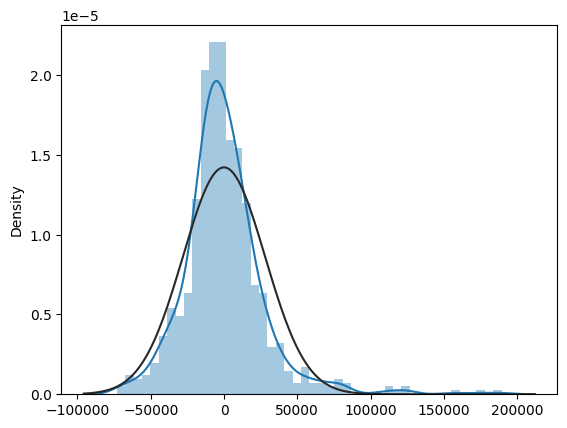

In [ ]:
sns.distplot(model2.resid, fit=stats.norm)

Распределение остатков отличается от нормального (они довольно симметричны, но проблема с пиком, причем пик концентрируется в нуле, как и в примере с семинара).

# Гетероскедастичность

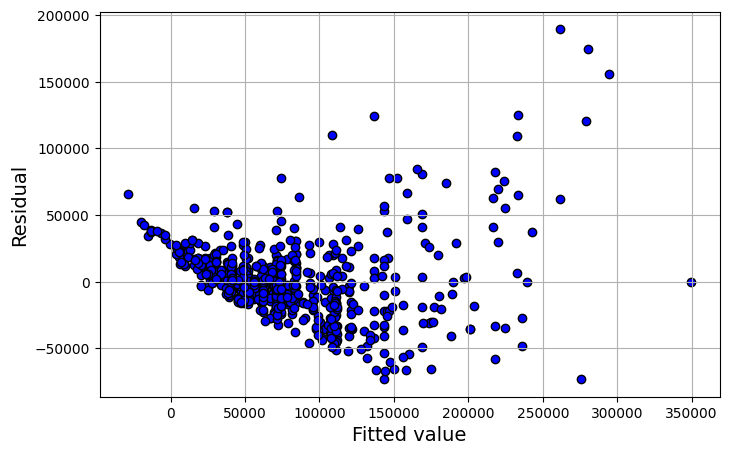

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x=model2.fittedvalues, y=model2.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show() # много выбросов

# Мультиколлинеарность

In [ ]:
vifs = np.array([vif(model2.model.exog, i) for i in range(model2.model.exog.shape[1])])

In [ ]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model2.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
9,1.075389,brand_infinix
12,1.094823,OS_chrome
13,1.097006,OS_dos
10,1.201875,processor_brand_amd
6,1.335682,brand_acer
7,1.402532,brand_msi
5,1.426838,brand_dell
1,1.545812,primary_storage_capacity
4,1.625318,brand_hp
3,1.714361,brand_lenovo


Ожидаемо, переменные OS_mac processor_brand_apple и brand_apple коррелируют, нужно было учесть это при посроении модели. С остальными переменными проблем нет.

# Выбросы и влияющие наблюдения

In [ ]:
influence = model2.get_influence()
inf_sum = influence.summary_frame()
inf_sum.head()

,dfb_const,dfb_num_cores,dfb_primary_storage_capacity,dfb_resolution_width,dfb_brand_lenovo,dfb_brand_hp,dfb_brand_dell,dfb_brand_acer,dfb_brand_msi,dfb_brand_apple,...,dfb_OS_dos,dfb_OS_mac,dfb_gpu_type_dedicated,dfb_gpu_type_integrated,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
index,,,,,,,,,,,,,,,,,,,,,
3.0,0.001246,0.006454,0.015044,-0.003784,-0.002786,-0.041345,-0.010154,-0.003856,0.001148,-0.002527,...,0.002741,0.001398,-0.014423,0.003623,0.000386,-0.733626,0.012742,-0.083345,-0.733382,-0.083317
4.0,0.002376,-0.051887,0.018651,0.017498,0.000210,0.001177,0.006609,-0.093431,-0.004556,-0.004521,...,0.005467,0.000313,-0.003780,-0.020832,0.000999,-0.966213,0.018899,-0.134103,-0.966167,-0.134097
5.0,0.005069,0.001793,-0.000388,-0.002656,-0.020271,0.000895,-0.000765,-0.000298,-0.003116,-0.000349,...,0.010303,-0.000114,0.000302,-0.004986,0.000095,-0.386460,0.011299,-0.041314,-0.386224,-0.041288
6.0,-0.118181,-0.025686,0.070776,0.110185,0.011804,0.014770,-0.009172,0.015889,0.003788,0.153899,...,0.011195,-0.233838,-0.004340,0.011928,0.041562,-2.683270,0.094126,-0.864940,-2.695302,-0.868818
7.0,-0.011153,-0.032903,-0.009712,0.020193,-0.001820,0.001454,0.002588,0.001541,0.002784,0.000998,...,-0.000225,-0.001148,0.016803,0.012943,0.005554,0.938768,0.101879,0.316180,0.938688,0.316153


In [ ]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values().head(4)
# потенциальные влияющие наблюдения (их индексы)

index
153.0   -24.599659
620.0     1.395495
23.0      1.503977
613.0     1.735029
Name: dffits, dtype: float64

In [ ]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values().head(6)
# потенциальные выбросы (их индексы)

index
969.0    3.041038
328.0    3.914172
381.0    3.917152
819.0    4.408952
23.0     4.479221
352.0    4.489412
Name: standard_resid, dtype: float64

Выбросы могут объясняться непредставительными наблюдениями (например, из-за специфических характеристик ноутбука) и высокой вариативностью в ценах на ноутбуки в зависимости от бренда и характеристик.

# Результаты анализа

Очевидные результаты:

Гипотеза подтвердилась: например, влияние бренда на цену ноутбука оказалось значительным. Бренды, такие как Apple, Dell, HP и Lenovo, увеличивают цену, что соответствует ожиданиям, так как эти бренды известны качеством и имеют хорошую репутацию.
Количество ядер процессора и емкость хранения также показали ожидаемое положительное влияние на цену, что логично, так как эти характеристики напрямую связаны с производительностью устройства.

Неожиданные результаты:

Негативное влияние ноутбуков с интегрированной графикой на цену стало неожиданным, но это может объясняться тем, что такие ноутбуки ориентированы на менее требовательных пользователей и, соответственно, имеют более низкую цену.
Значительное снижение цены для ноутбуков с macOS также удивительно, так как ожидалось, что устройства Apple будут дороже.

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 13 ноября.